In [1]:
import pandas as pd
from VideoToPose import *
import sys
import matplotlib.pyplot as plt

C:\Users\dadic\AppData\Local\Temp\ipykernel_14704\4172642070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
count = 0
total_frames = 0
lowest = 9999
highest = 0


In [3]:
lookup_df = pd.read_csv("dataset/wlasl_100_lookup.csv", converters={'video_id': str})


data = [] # (video_id, length)
# finding the mean, smallest and largest
for vid_id in lookup_df['video_id'].values:
    length = len(landmark_from_json(vid_id)['f'][0])
    data.append((vid_id, length))

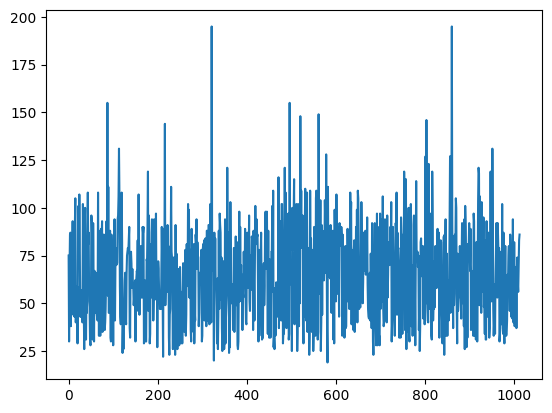

[('69241', 75), ('07069', 30), ('07068', 68), ('07070', 86), ('07099', 87), ('07074', 38), ('69302', 77), ('65539', 44), ('17710', 70), ('17733', 93), ('65540', 46), ('17734', 89), ('17711', 81), ('17712', 43), ('17713', 91), ('17709', 105), ('17720', 40), ('17721', 48), ('17722', 48), ('17723', 59), ('17724', 29), ('12328', 88), ('12312', 101), ('12311', 72), ('12338', 107), ('12313', 81), ('12314', 43), ('12315', 57), ('12316', 43), ('12317', 53), ('12318', 45), ('12319', 40), ('12320', 102), ('12326', 73), ('12327', 46), ('05728', 26), ('05749', 90), ('05750', 100), ('05729', 52), ('05730', 31), ('65167', 58), ('05731', 45), ('05732', 86), ('05733', 108), ('05734', 81), ('05727', 87), ('05739', 51), ('05740', 48), ('05741', 31), ('05742', 28), ('05743', 47), ('09848', 96), ('09869', 93), ('09849', 81), ('09850', 31), ('09851', 92), ('65328', 59), ('09854', 30), ('69345', 67), ('24955', 60), ('24956', 45), ('24941', 66), ('24960', 45), ('24961', 45), ('24962', 42), ('65824', 41), ('2

In [4]:
plt.plot([length for _, length in data])
plt.show()
print(data)

In [7]:
# From observation we can savely put the limit to around 120, without much data reduction. 
# But you can play around with it. Setting this to a low number will definitely impact the
# network's ability to learn.
filtered_lookup_df = lookup_df

loss = 0
limit = 120
for video_id, length in data:
    if length > limit:
        loss += 1
        filtered_lookup_df = filtered_lookup_df.loc[filtered_lookup_df['video_id'] != video_id]
        
print(loss)

17


In [8]:
# Saving lookup
filtered_lookup_df.to_csv("dataset/filtered_wlasl_100_lookup.csv", header=True, index_label=False)